# 영업 성공 여부 분류 경진대회

## 1. 데이터 확인

### 필수 라이브러리

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  
from wordcloud import WordCloud

import warnings
warnings.filterwarnings(action='ignore')

/tmp/ipykernel_907608/1098601899.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 데이터 셋 읽어오기

In [2]:
df_train = pd.read_csv("./Data/train.csv") # 학습용 데이터
df_test = pd.read_csv("./Data/submission.csv") # 테스트 데이터(제출파일의 데이터)

In [3]:
df_train.head() # 학습용 데이터 살펴보기

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5271 non-null   int64  
 1   bant_submit              5271 non-null   float64
 2   customer_country         5271 non-null   object 
 3   business_unit            5271 non-null   object 
 4   com_reg_ver_win_rate     1788 non-null   float64
 5   customer_idx             5271 non-null   int64  
 6   customer_type            3814 non-null   object 
 7   enterprise               5271 non-null   object 
 8   historical_existing_cnt  1275 non-null   float64
 9   id_strategic_ver         593 non-null    float64
 10  it_strategic_ver         53 non-null     float64
 11  idit_strategic_ver       646 non-null    float64
 12  customer_job             3832 non-null   object 
 13  lead_desc_length         5271 non-null   int64  
 14  inquiry_type            

In [6]:
df_train = df_train.drop("is_converted", axis=1)
df_test = df_test.drop(["id", "is_converted"], axis=1)
df = pd.concat([df_train, df_test], ignore_index=True)
df

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner
0,1.00,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,entry level,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0
1,1.00,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,ceo/founder,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1
2,1.00,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,partner,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2
3,1.00,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,ceo/founder,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3
4,1.00,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,partner,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64565,0.50,/São Paulo/Brazil,AS,NaN,40292,NaN,Enterprise,10.0,NaN,NaN,...,associate/analyst,LGESP,NaN,0,0,NaN,NaN,NaN,NaN,97
64566,0.25,General / / United States,IT,NaN,47466,NaN,Enterprise,0.0,NaN,NaN,...,none,LGEUS,NaN,0,0,NaN,NaN,NaN,NaN,438
64567,0.75,/ OURO BRANCO / Brazil,AS,NaN,46227,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,manager,LGESP,less than 3 months,0,0,NaN,NaN,NaN,NaN,97
64568,0.00,/ / Germany,IT,NaN,45667,End Customer,SMB,NaN,NaN,NaN,...,none,LGEDG,NaN,0,0,NaN,NaN,NaN,NaN,429


In [7]:
def wordcloud_visualize(df):

    # 토큰과 빈도수를 따로 분리합니다.
    tokens = list(df.value_counts().keys())
    frequencies = df.value_counts()

    # 상위 n개의 토큰만 선택하여 시각화할 수도 있습니다.
    n = 50
    top_tokens = tokens[:n]
    top_frequencies = frequencies[:n]

    # 막대 그래프로 시각화합니다.
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(top_tokens)), top_frequencies, tick_label=top_tokens)
    plt.xlabel('Token')
    plt.ylabel('Frequency')
    plt.title('Top {} Tokens Frequency'.format(n))
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # 워드 클라우드로 시각화합니다.
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Tokens')
    plt.show()

## 2. Preprocessing

### Customer country, response_corporate

In [8]:
df_con_cor = df[['customer_country', 'response_corporate']]
df_con_cor

,customer_country,response_corporate
0,/Quezon City/Philippines,LGEPH
1,/PH-00/Philippines,LGEPH
2,/Kolkata /India,LGEIL
3,/Bhubaneswar/India,LGEIL
4,/Hyderabad/India,LGEIL
...,...,...
64565,/São Paulo/Brazil,LGESP
64566,General / / United States,LGEUS
64567,/ OURO BRANCO / Brazil,LGESP
64568,/ / Germany,LGEDG


In [9]:
# for cor in df_con_cor['response_corporate'].unique():
#     # if cor == 'LGEKR':
#     print(cor)
#     wordcloud_visualize(df_con_cor[df_con_cor['response_corporate'] == cor]['customer_country'])

LGEPH: 필리핀 \
LGEIL: 인도 \
LGEAF: 아프리카 \
LGESJ: 사우디아라비아 \
LGESL: 남부아시아, 오세아니아(방글라데시, 싱가포르, 몰디브, 피지, 파푸아뉴기니 등) \
LGESP: 브라질 \
LGEGF: 중동(UAE, 카타르, 이란, 오만, 파키스탄 등) \
LGESA: 남부 아프리카 (남아공 등), 홍콩(이상치?) \
LGEUS: 미국 \
LGECB: 콜롬비아 \
LGEMS: 멕시코 \
LGEEG: 북아프리카(이집트, 튀니지 등) \
LGEEF: 중아프리카(케냐, 에티오피아 등) \
LGEAP: 호주 \
LGEIN: 인도네시아 \
LGEUK: 영연방(아일랜드 포함) \
LGEKR: 여러 나라 섞여 있음(한국의 외국 지사인듯) \
LGEPS: 중남미(에콰도르, 파나마, 코스타리카 등) \
LGECI: 캐나다 \
LGECL: 중남미 남부(칠레, 볼리비아, 우루과이 등) \
LGETK: 터키(터키, 튀르키예 섞여있음) \
LGELF: 중동(이라크, 요르단 레바논, 이스라엘(?) 등) \
LGEPT: 포르투갈 \
LGEPR: 페루 \
LGEDG: 중부 유럽(독일, 스위스) \
LGERO: 루마니아 \
LGEMK: 동유럽(헝가리, 불가리아, 세르비아, 크로아티아 등) \
LGEPL: 폴란드 \
LGECZ: 체코 \
LGEES: 스페인 (파나마, 멕시코 등 섞여 있음) \
LGEAR: 아르헨티나 \
LGEHK: 홍콩 \
LGEML: 말레이시아 \
LGEJP: 일본 \
LGEHS: 그리스, 키프로스 \
LGEAS: 알제리 \
LGEYK: 이스라엘 \
LGEIS: 이탈리아 (몰타?) \
LGEBN: 벨기에, 네덜란드 \
LGEFS: 프랑스 \
LGESW: 북유럽(스웨덴, 덴마크, 노르웨이 등) \
LGEMC: 모로코, 수단 \
LGEAG: 오스트리아, 스위스 \
LGEEB: 슬로베니아 \
LGETH: 동남아(태국, 미얀마, 라오스 등) \
LGEVH: 베트남 \
LGECH: 중국 \
LGELA: 라트비아, 리투아니아 \
LGETT: 타이완 \
LGERA: 러시아 \
LGEUR: 우크라이나 \
LGEIR: 이란 \
LGEBT: 포르투갈(리스본) 

#### 전처리 idea
##### 1. 법인명의 지역이 잘 구분되어 있음 (customer_country 빼도 좋을듯?)
##### 2. 법인명 지역 활용해서 대륙 feature 생성 가능할 듯 
##### 3. customer_country 결측치를 response_corporate를 활용해서 채울 수 있을 듯
##### 4. customer_country 대륙/나라/도시 기준 전처리 가능할 듯

### customer_idx: 고객의 회사명

In [10]:
cus_idx_tr = df_train['customer_idx']
cus_idx_te = df_test['customer_idx']

In [11]:
len(sorted(cus_idx_tr.unique()))

35112

In [12]:
len(sorted(cus_idx_te.unique()))

4069

In [13]:
# 교집합
len(sorted(list(set(cus_idx_te.unique()).intersection(set(cus_idx_tr.unique())))))

445

In [14]:
# 차집합 (test - train)
len(sorted(list(set(cus_idx_te.unique()).difference(set(cus_idx_tr.unique())))))

3624

In [15]:
# 집합 (train - test)
len(sorted(list(set(cus_idx_tr.unique()).difference(set(cus_idx_te.unique())))))

34667

##### 1. 범주형 변수로 취급
##### 2. 생각보다 교집합이 별로 없음(submission에 새로 등장하는 customer_idx가 많음) -> 라벨 인코딩 하면 좋을듯

### customer_type: 고객 유형

In [16]:
cus_type = df['customer_type']
cus_type

0                 End-Customer
1                 End-Customer
2                 End-Customer
3                 End-Customer
4        Specifier/ Influencer
                 ...          
64565                      NaN
64566                      NaN
64567    Specifier/ Influencer
64568             End Customer
64569             End Customer
Name: customer_type, Length: 64570, dtype: object

In [17]:
cus_type.value_counts()

customer_type
End-Customer                    6648
End Customer                    6449
Specifier/ Influencer           3313
Channel Partner                 1695
Service Partner                  447
Solution Eco-Partner             292
Installer/Contractor              52
Specifier / Influencer            43
Corporate                         31
HVAC Engineer                     23
Engineer                          20
Developer                         18
Technician                        16
Consultant                        15
Home Owner                        10
Other                             10
End-user                           8
Manager / Director                 8
Software/Solution Provider         7
Etc.                               6
Reseller                           5
Homeowner                          5
Architect/Consultant               5
Interior Designer                  5
Installer                          5
Distributor                        4
Others                  

In [18]:
cus_type.nunique()

33

In [25]:
# 중복 값 처리
df_copy = df.copy()
df_copy.loc[df_copy['customer_type'] == 'End Customer', 'customer_type'] = 'End-Customer'

df_copy.loc[df_copy['customer_type'] == 'Commercial end-user', 'customer_type'] = 'End-user'

df_copy.loc[df_copy['customer_type'] == 'Specifier/ Influencer', 'customer_type'] = 'Specifier / Influencer'

df_copy.loc[df_copy['customer_type'] == 'Software/Solution Provider', 'customer_type'] = 'Software / Solution Provider'

df_copy.loc[df_copy['customer_type'] == 'Homeowner', 'customer_type'] = 'Home Owner'

df_copy.loc[df_copy['customer_type'] == 'Etc.', 'customer_type'] = 'Other'
df_copy.loc[df_copy['customer_type'] == 'Others', 'customer_type'] = 'Other'
df_copy['customer_type'].value_counts()


customer_type
End-Customer                    13097
Specifier / Influencer           3356
Channel Partner                  1695
Service Partner                   447
Solution Eco-Partner              292
Installer/Contractor               52
Corporate                          31
HVAC Engineer                      23
Other                              20
Engineer                           20
Developer                          18
Technician                         16
Consultant                         15
Home Owner                         15
End-user                            9
Manager / Director                  8
Software / Solution Provider        8
Installer                           5
Interior Designer                   5
Reseller                            5
Architect/Consultant                5
Distributor                         4
System Integrator                   2
Dealer/Distributor                  2
Technical Assistant                 1
Administrator                       

In [26]:
df_copy['customer_type'].nunique()

26

In [27]:
df_copy['customer_type'].isna().sum()

45418

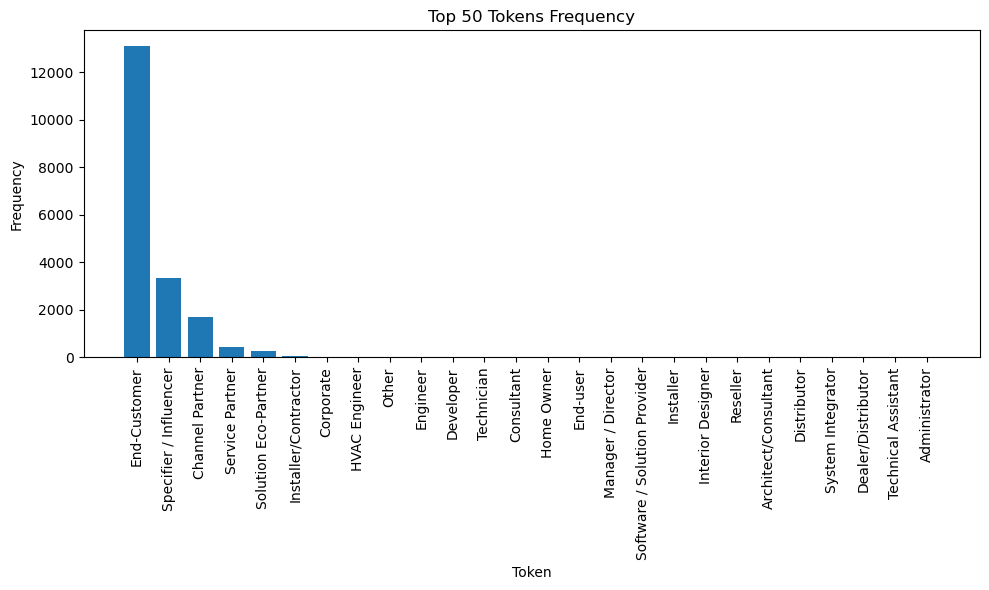

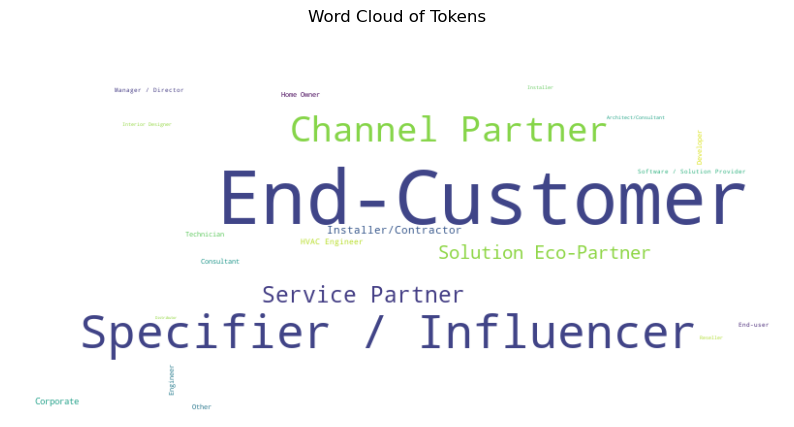

In [28]:
cus_type = df_copy['customer_type']
wordcloud_visualize(cus_type)

#### 전처리 idea
##### 1. 결측치는 기존대로 UKN으로 가면 될 듯
##### 2. 결측치가 많으므로 drop도 고려

### customer_job: 고객의 직업군

In [29]:
cus_job = df['customer_job']
cus_job

0                     purchasing
1        media and communication
2                    engineering
3               entrepreneurship
4                     consulting
                  ...           
64565                      sales
64566                        NaN
64567           entrepreneurship
64568                        NaN
64569                        NaN
Name: customer_job, Length: 64570, dtype: object

In [30]:
cus_job.value_counts()

customer_job
engineering                   7070
other                         4876
administrative                3666
education                     2695
sales                         2380
                              ... 
facilities and operations        1
technical / decision maker       1
installation and purchaser       1
hr posting                       1
part of video wall               1
Name: count, Length: 562, dtype: int64

In [31]:
cus_job.nunique()

562

In [32]:
# n번 이상 나오는 것들 갯수 체크

# 비슷한 값 처리
df_copy = df.copy()
df_copy.loc[df_copy['customer_job'] == 'others', 'customer_job'] = 'other'

job_nunique = []
threshold_list = []

# 값의 개수를 세고, 일정 개수 이상 나오는 것들만 필터링
for threshold in range(1, 11):
    threshold = threshold
    value_counts = df_copy['customer_job'].value_counts()
    filtered_values = value_counts[value_counts >= threshold].index

    # 필터링된 값들로 DataFrame 필터링
    filtered_df = df_copy[df_copy['customer_job'].isin(filtered_values)]

    threshold_list.append(threshold)
    job_nunique.append(filtered_df['customer_job'].nunique())

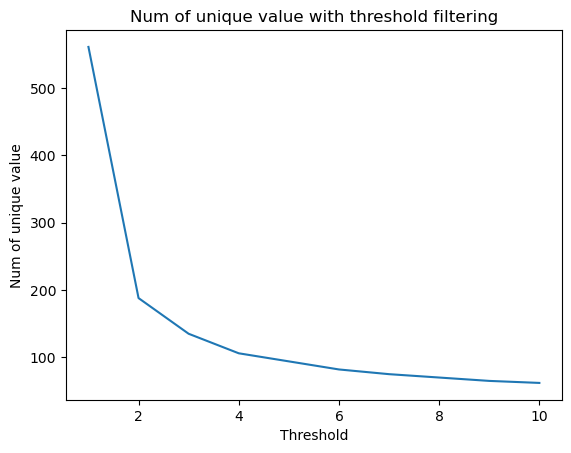

In [33]:
# 그래프 그리기
plt.plot(threshold_list, job_nunique)

# 그래프 제목과 축 라벨 설정
plt.title('Num of unique value with threshold filtering')
plt.xlabel('Threshold')
plt.ylabel('Num of unique value')

# 그래프 보여주기
plt.show()

In [34]:
cus_job = df_copy['customer_job']
cus_job.isna().sum()

20172

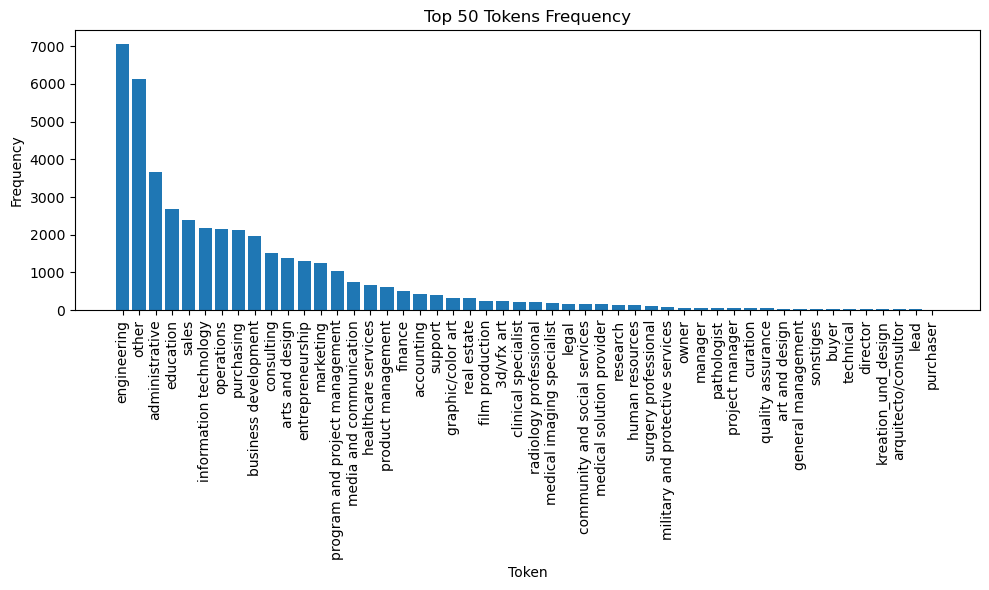

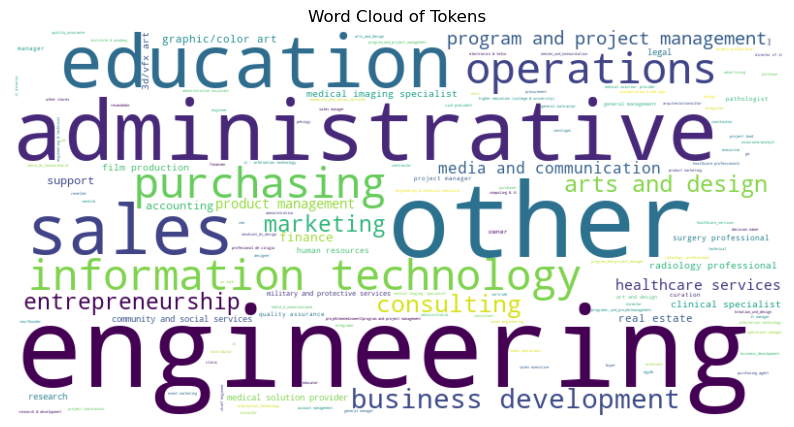

In [35]:
wordcloud_visualize(cus_job)

#### 전처리 idea
##### 1. 결측치가 많음(None으로 채우기)
##### 2. Threshold 활용해서 적게 나오는 feature는 other로 변경

### customer_position: 고객의 회사 직책

In [36]:
cus_pos = df['customer_position']
cus_pos

0              entry level
1              ceo/founder
2                  partner
3              ceo/founder
4                  partner
               ...        
64565    associate/analyst
64566                 none
64567              manager
64568                 none
64569                 none
Name: customer_position, Length: 64570, dtype: object

In [37]:
cus_pos.value_counts()

customer_position
none                                                  21637
manager                                                8943
ceo/founder                                            8577
other                                                  6524
director                                               5186
                                                      ...  
técnico                                                   1
quantitative aptitude faculty                             1
english trainer for ielts,toefl,pte,gre,sat exams.        1
associate professor                                       1
architecture/consult                                      1
Name: count, Length: 118, dtype: int64

In [38]:
cus_pos.nunique()

118

In [39]:
cus_pos.isna().sum()

0

In [40]:
# n번 이상 나오는 것들 갯수 체크

# 비슷한 값 처리
df_copy = df.copy()
df_copy.loc[df_copy['customer_position'] == 'others', 'customer_position'] = 'other'

position_nunique = []
threshold_list = []

# 값의 개수를 세고, 일정 개수 이상 나오는 것들만 필터링
for threshold in range(1, 11):
    threshold = threshold
    value_counts = df_copy['customer_position'].value_counts()
    filtered_values = value_counts[value_counts >= threshold].index

    # 필터링된 값들로 DataFrame 필터링
    filtered_df = df_copy[df_copy['customer_position'].isin(filtered_values)]

    threshold_list.append(threshold)
    position_nunique.append(filtered_df['customer_position'].nunique())

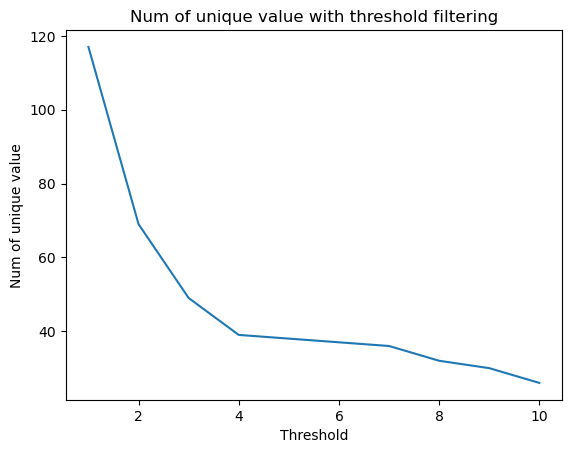

In [41]:
# 그래프 그리기
plt.plot(threshold_list, position_nunique)

# 그래프 제목과 축 라벨 설정
plt.title('Num of unique value with threshold filtering')
plt.xlabel('Threshold')
plt.ylabel('Num of unique value')

# 그래프 보여주기
plt.show()

In [42]:
cus_pos = df_copy['customer_position']
cus_pos.isna().sum()

0

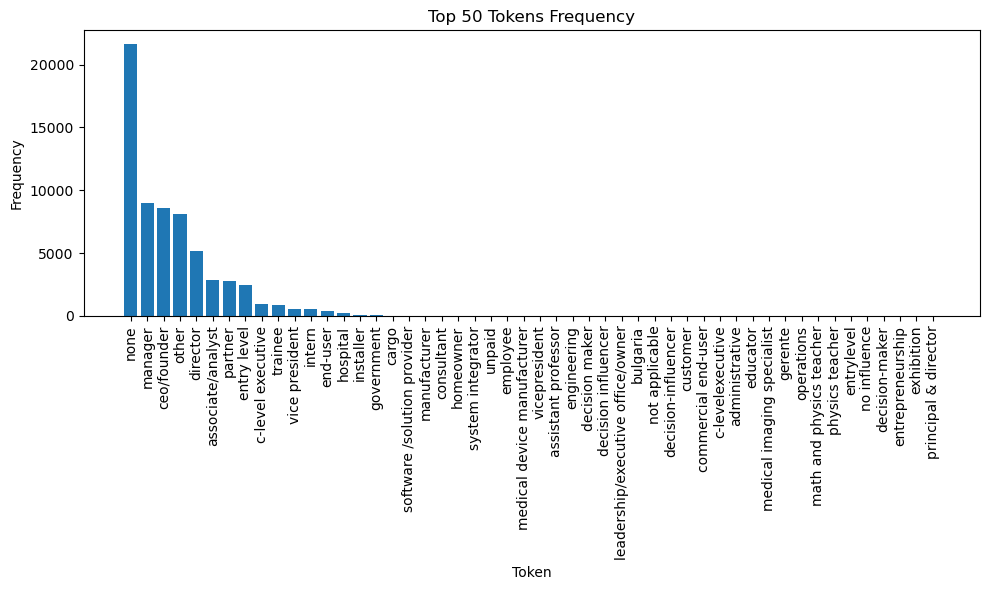

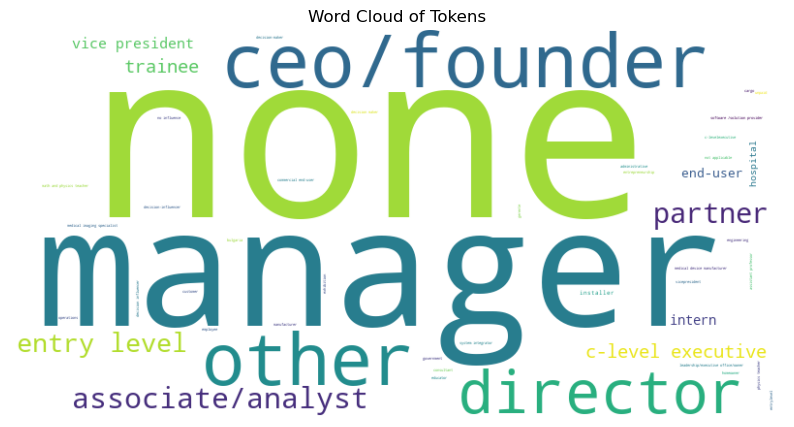

In [43]:
wordcloud_visualize(cus_pos)

#### 전처리 idea
##### 1. 결측치가 많음(none으로 채우기)
##### 2. Threshold 활용해서 적게 나오는 feature는 other로 변경